In [1]:
import os
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats as stats

# from s2 lab1
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
import graphviz
from scipy.stats import randint

#test test

In [2]:

imdb_raw_link = os.path.join(os.getcwd(), 'datasets', 'imdbFinalMerge.csv')
imdb_raw = pd.read_csv(imdb_raw_link)

In [3]:
imdb_raw['MetascoreScaled'] = imdb_raw['Metascore']*0.09+1
imdb_raw

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,MetascoreScaled
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,1,0,0,7.84
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,1,0,0,0,0,6.85
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,1,6.58
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,1,6.31
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,1,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,0,0,0,0,1,0,5.05
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,0,0,0,0,0,0,0,0,0,5.14
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,1,0,0,0,0,0,0,0,0,5.50
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,1,0,0,2.98


In [4]:
imdb_scores1 = pd.concat([imdb_raw, imdb_raw], ignore_index=True)
imdb_scores1

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,MetascoreScaled
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,1,0,0,7.84
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,1,0,0,0,0,6.85
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,1,6.58
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,1,6.31
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,1,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,0,0,0,0,1,0,5.05
1996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,0,0,0,0,0,0,0,0,0,5.14
1997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,1,0,0,0,0,0,0,0,0,5.50
1998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,1,0,0,2.98


In [5]:
imdb_scores1['Score type'] = 'IMDb Rating'
imdb_scores1['Score type'].loc[1000:2000] = 'MetascoreScaled'
scoreList = pd.concat([imdb_raw['Rating'], imdb_raw['MetascoreScaled']], ignore_index=True, axis=0)
imdb_scores1['Score'] = scoreList
# imdb_scores['Score'].loc[0:999] = imdb_raw['Rating']
# imdb_scores['Score'].loc[1000:1999] = imdb_raw['MetascoreScaled']
imdb_scores1
imdb_scores1.dropna(subset=['Rating', 'MetascoreScaled'], axis=0, inplace=True)

/tmp/ipykernel_175/500253295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_scores1['Score type'].loc[1000:2000] = 'MetascoreScaled'


<AxesSubplot:xlabel='Score', ylabel='Count'>

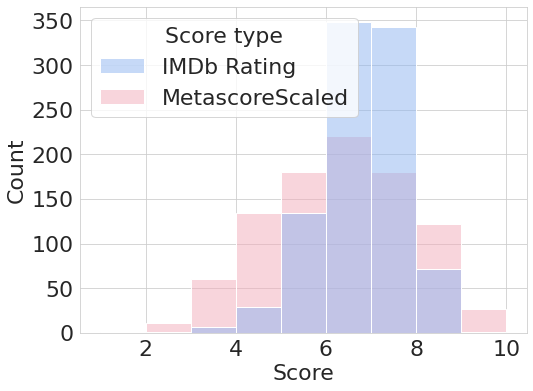

In [6]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 22
sns.set_style("whitegrid")
# plt.xlim(0,10)
# plt.ylim(0,300)
plt.yticks(range(0, 351, 50))
sns.histplot(data=imdb_scores1, x="Score",bins=range(1, 11, 1), edgecolor='white', hue='Score type',palette=sns.color_palette(['#8eb5f1','#f3acba'])) 

<AxesSubplot:xlabel='Score type', ylabel='Score'>

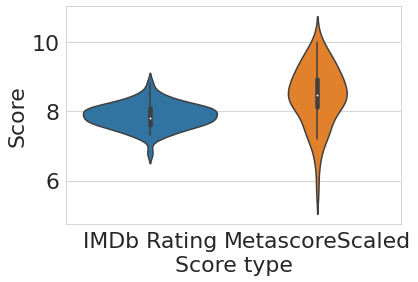

In [7]:
imdb_oscarOnly = imdb_scores1[imdb_scores1['OscarPictureNomineeWinner']==1]
sns.violinplot(x='Score type', y='Score', data=imdb_oscarOnly)

<AxesSubplot:xlabel='Score', ylabel='Count'>

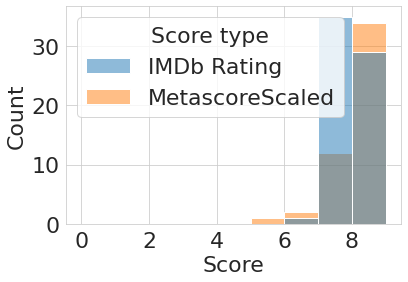

In [8]:
sns.set_style("whitegrid")

sns.histplot(data=imdb_oscarOnly, x="Score",bins=range(0, 10, 1), edgecolor='white', hue='Score type')

In [9]:
imdb_oscarOnlySingle = imdb_raw[imdb_raw['OscarPictureNomineeWinner']==1]

In [10]:
# scoreslist = []
# distributions = ['5-6', '6-7', '7-8','8-9','9-10']


# toUpper = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['Rating']<6) & (imdb_oscarOnlySingle['Rating']>=5)].shape[0]
# toUpperMeta = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['MetascoreScaled']<6) & (imdb_oscarOnlySingle['MetascoreScaled']>=5)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

# toUpper = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['Rating']<7) & (imdb_oscarOnlySingle['Rating']>=6)].shape[0]
# toUpperMeta = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['MetascoreScaled']<7) & (imdb_oscarOnlySingle['MetascoreScaled']>=6)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

# toUpper = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['Rating']<8) & (imdb_oscarOnlySingle['Rating']>=7)].shape[0]
# toUpperMeta = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['MetascoreScaled']<8) & (imdb_oscarOnlySingle['MetascoreScaled']>=7)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

# toUpper = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['Rating']<9) &(imdb_oscarOnlySingle['Rating']>=8)].shape[0]
# toUpperMeta = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['MetascoreScaled']<9) & (imdb_oscarOnlySingle['MetascoreScaled']>=8)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

# toUpper = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['Rating']<=10) & (imdb_oscarOnlySingle['Rating']>=9)].shape[0]
# toUpperMeta = imdb_oscarOnlySingle[(imdb_oscarOnlySingle['MetascoreScaled']<=10) & (imdb_oscarOnlySingle['MetascoreScaled']>=9)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

# imdb_score_distribution_oscar =  pd.DataFrame(scoreslist, index=distributions,
#                           columns=['Number of Rating', 'Number of MetascoreScaled'])

# imdb_score_distribution_oscar['Range']=distributions

In [11]:
# imdb_score_distribution_oscar

In [12]:
# observed = imdb_score_distribution_oscar['Number of MetascoreScaled']
# real_ratios = imdb_score_distribution_oscar['Number of Rating']/imdb_score_distribution_oscar['Number of Rating'].sum()
# # real_ratios
# expected = real_ratios*imdb_score_distribution_oscar['Number of MetascoreScaled'].sum()
# expected
# chi_squared_stat = (((observed - expected)**2)/expected).sum()
# print(chi_squared_stat)


# crit = stats.chi2.ppf(q=0.95, df=8)
# print(crit)
# p_value = 1-stats.chi.cdf(x=chi_squared_stat, df=8)
# print(p_value)
# stats.chisquare(f_obs = observed, f_exp=expected)


In [13]:

imdb_rating7 = imdb_raw[imdb_raw['Rating']>=7]
imdb_meta7 = imdb_raw[imdb_raw['MetascoreScaled']>=6.49]
genre = ['Action', 'Adventure','Animation','Biography','Comedy','Crime',
'Drama','Family','Fantasy','History','Horror','Music','Musical','Mystery',
'Romance','Sci-Fi','Sport','Thriller','War','Western']
sumListRating=[]
for i in range(0, len(genre)):
    temp = imdb_rating7[genre[i]].sum()
    print(temp)
    sumListRating.append(temp)

sumSeriesRating = pd.Series(sumListRating, index=genre)
sumSeriesRating = sumSeriesRating.sort_values(ascending = False)
sumSeriesRating



sumListMeta=[]
for i in range(0, len(genre)):
    temp = imdb_meta7[genre[i]].sum()
    print(temp)
    sumListMeta.append(temp)

sumSeriesMeta = pd.Series(sumListMeta, index=genre)
sumSeriesMeta = sumSeriesMeta.sort_values(ascending = False)
sumSeriesMeta

114
116
34
61
105
72
286
20
38
20
26
8
3
50
56
52
10
81
9
3
102
115
36
54
119
58
275
19
37
20
45
8
2
51
48
58
10
86
7
2


Drama        275
Comedy       119
Adventure    115
Action       102
Thriller      86
Crime         58
Sci-Fi        58
Biography     54
Mystery       51
Romance       48
Horror        45
Fantasy       37
Animation     36
History       20
Family        19
Sport         10
Music          8
War            7
Musical        2
Western        2
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Comedy'),
  Text(2, 0, 'Adventure'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Sci-Fi'),
  Text(7, 0, 'Biography'),
  Text(8, 0, 'Mystery'),
  Text(9, 0, 'Romance'),
  Text(10, 0, 'Horror'),
  Text(11, 0, 'Fantasy'),
  Text(12, 0, 'Animation'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Family'),
  Text(15, 0, 'Sport'),
  Text(16, 0, 'Music'),
  Text(17, 0, 'War'),
  Text(18, 0, 'Musical'),
  Text(19, 0, 'Western')])

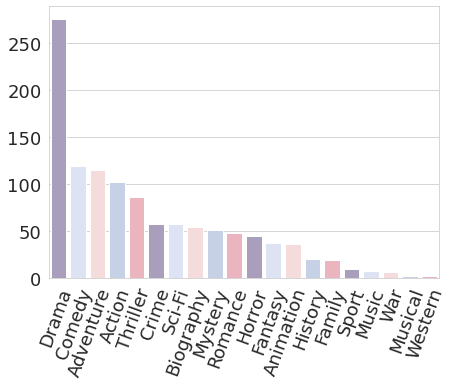

In [14]:
plt.rcParams['font.size'] = 18
plt.figure(figsize=(7,5))
sns.barplot(x=sumSeriesMeta.index, y=sumSeriesMeta, palette = sns.color_palette(['#a899c1', '#dae1f6','#f7d9d7','#c1cfea','#f3acba']))
plt.xticks(rotation=70, rotation_mode='anchor', horizontalalignment="right")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Drama'),
  Text(1, 0, 'Adventure'),
  Text(2, 0, 'Action'),
  Text(3, 0, 'Comedy'),
  Text(4, 0, 'Thriller'),
  Text(5, 0, 'Crime'),
  Text(6, 0, 'Biography'),
  Text(7, 0, 'Romance'),
  Text(8, 0, 'Sci-Fi'),
  Text(9, 0, 'Mystery'),
  Text(10, 0, 'Fantasy'),
  Text(11, 0, 'Animation'),
  Text(12, 0, 'Horror'),
  Text(13, 0, 'History'),
  Text(14, 0, 'Family'),
  Text(15, 0, 'Sport'),
  Text(16, 0, 'War'),
  Text(17, 0, 'Music'),
  Text(18, 0, 'Musical'),
  Text(19, 0, 'Western')])

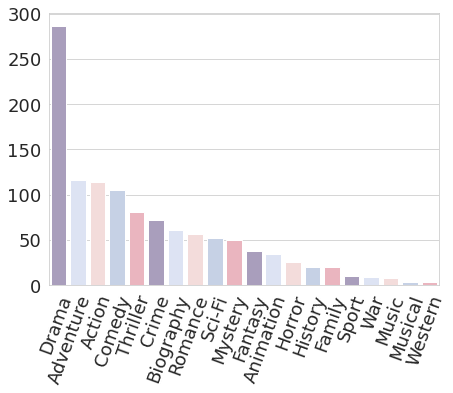

In [15]:

plt.figure(figsize=(7,5))
sns.barplot(x=sumSeriesRating.index, y=sumSeriesRating, palette = sns.color_palette(['#a899c1', '#dae1f6','#f7d9d7','#c1cfea','#f3acba']))
plt.rcParams['font.size'] = 17
plt.xticks(rotation=70, rotation_mode='anchor', horizontalalignment="right")




In [16]:
imdb_mix= imdb_scores1[ ((imdb_scores1['Score']>= 6.49) & (imdb_scores1['Score type'] == 'MetascoreScaled'))|((imdb_scores1['Score']>= 7) & (imdb_scores1['Score type'] == 'Rating'))]

<AxesSubplot:xlabel='Score type', ylabel='Revenue (Millions)'>

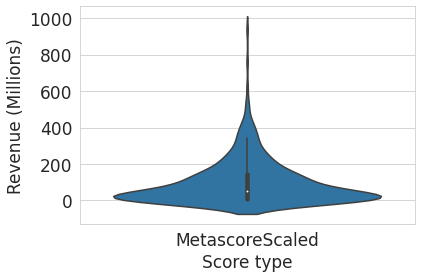

In [17]:
sns.violinplot(x='Score type', y='Revenue (Millions)', data=imdb_mix)

In [18]:
imdb_scores1['TwoTimes'] = imdb_scores1["Revenue (Millions)"] >=2 * imdb_scores1["Budget (Millions)"]
imdb_mix1 = imdb_scores1[imdb_scores1['TwoTimes']==True]

<AxesSubplot:xlabel='Score type', ylabel='Score'>

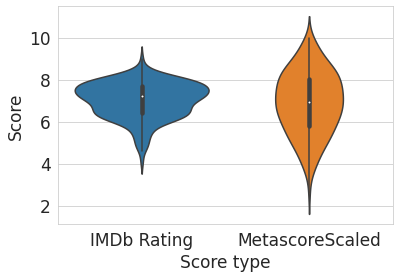

In [19]:
sns.violinplot(x='Score type', y='Score', data=imdb_mix1)

<AxesSubplot:xlabel='Score', ylabel='Count'>

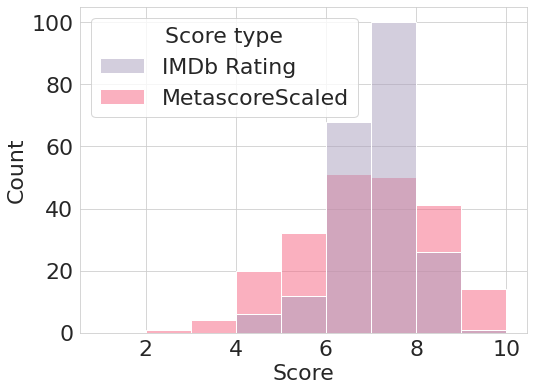

In [20]:
plt.figure(figsize=(8,6))
plt.rcParams['font.size'] = 22
sns.set_style("whitegrid")
# plt.xlim(0,10)
# plt.ylim(0,300)
# plt.yticks(range(0, 65, 5))
sns.histplot(data=imdb_mix1, x="Score",bins=range(1, 11, 1), edgecolor='white', hue='Score type',palette=sns.color_palette(['#a99ebc','#F66381'])) 

<AxesSubplot:xlabel='Score type', ylabel='Score'>

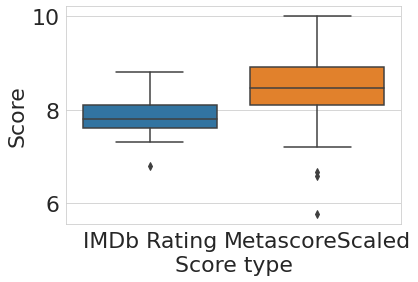

In [21]:
sns.boxplot(x='Score type', y='Score', data=imdb_oscarOnly)

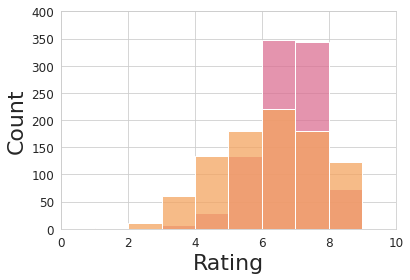

In [22]:
imdb_scores = imdb_raw[['Rating', 'MetascoreScaled']].dropna(subset=['Rating', 'MetascoreScaled'], how='any' )

sns.set_style("whitegrid")
plt.xlim(0,10)
plt.ylim(0,400)
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.histplot(data=imdb_scores, x="Rating",bins=range(0, 10, 1), color='palevioletred',edgecolor='white', label='Rating') 


plot = sns.histplot(data=imdb_scores, x="MetascoreScaled",bins=range(0, 10, 1), color='sandybrown',label='Metascore')
# plot.set_xticklabels((np.arange(0, 11, step=1)))

plot.tick_params(labelsize=12)


In [23]:
imdb_raw

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,MetascoreScaled
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,0,1,0,0,7.84
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,0,1,0,0,0,0,6.85
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,0,0,0,0,0,0,0,0,1,6.58
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,1,6.31
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,1,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,...,0,0,0,0,0,0,0,1,0,5.05
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,...,0,0,0,0,0,0,0,0,0,5.14
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,...,1,0,0,0,0,0,0,0,0,5.50
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,...,0,0,0,0,0,0,1,0,0,2.98


In [24]:
# imdb_scores_content.shape[0]

In [25]:
# get the population distribution

scoreslist = []
distributions = ['1-2', '2-3', '3-4','4-5','5-6', '6-7', '7-8','8-9','9-10']

# toUpper = imdb_scores[(imdb_scores['Rating']<1) & (imdb_scores['Rating']>=0)].shape[0]
# toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<1) & (imdb_scores['MetascoreScaled']>=0)].shape[0]
# scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<2) & (imdb_scores['Rating']>=1)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<2) & (imdb_scores['MetascoreScaled']>=1)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<3) & (imdb_scores['Rating']>=2)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<3)& (imdb_scores['MetascoreScaled']>=2)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<4) & (imdb_scores['Rating']>=3)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<4 )& (imdb_scores['MetascoreScaled']>=3)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<5) & (imdb_scores['Rating']>=4)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<5) & (imdb_scores['MetascoreScaled']>=4)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<6) & (imdb_scores['Rating']>=5)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<6) & (imdb_scores['MetascoreScaled']>=5)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<7) & (imdb_scores['Rating']>=6)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<7) & (imdb_scores['MetascoreScaled']>=6)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<8) & (imdb_scores['Rating']>=7)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<8) & (imdb_scores['MetascoreScaled']>=7)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<9) &(imdb_scores['Rating']>=8)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<9) & (imdb_scores['MetascoreScaled']>=8)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

toUpper = imdb_scores[(imdb_scores['Rating']<=10) & (imdb_scores['Rating']>=9)].shape[0]
toUpperMeta = imdb_scores[(imdb_scores['MetascoreScaled']<=10) & (imdb_scores['MetascoreScaled']>=9)].shape[0]
scoreslist.append([toUpper,toUpperMeta])

imdb_score_distribution =  pd.DataFrame(scoreslist, index=distributions,
                          columns=['Number of Rating', 'Number of MetascoreScaled'])

imdb_score_distribution['Range']=distributions
# imdb_score_distribution =imdb_score_distribution.groupby('Range')

In [26]:
imdb_score_distribution

,Number of Rating,Number of MetascoreScaled,Range
1-2,1,1,1-2
2-3,1,11,2-3
3-4,7,60,3-4
4-5,29,134,4-5
5-6,134,180,5-6
6-7,348,221,6-7
7-8,343,180,7-8
8-9,72,122,8-9
9-10,1,27,9-10


In [27]:
imdb_score_distribution['Number of Rating'].sum()

936

In [28]:
imdb_score_distribution['Number of MetascoreScaled'].sum()

936

In [29]:
observed = imdb_score_distribution['Number of MetascoreScaled']
real_ratios = imdb_score_distribution['Number of Rating']/imdb_score_distribution['Number of Rating'].sum()
# real_ratios
expected = real_ratios*imdb_score_distribution['Number of MetascoreScaled'].sum()
expected
chi_squared_stat = (((observed - expected)**2)/expected).sum()
print(chi_squared_stat)
# expected = real_ratios * len()

expected



1731.7797376260016


1-2       1.0
2-3       1.0
3-4       7.0
4-5      29.0
5-6     134.0
6-7     348.0
7-8     343.0
8-9      72.0
9-10      1.0
Name: Number of Rating, dtype: float64

In [30]:
crit = stats.chi2.ppf(q=0.95, df=8)
print(crit)
p_value = 1-stats.chi.cdf(x=chi_squared_stat, df=8)
print(p_value)


15.50731305586545
0.0


In [31]:
stats.chisquare(f_obs = observed, f_exp=expected)

Power_divergenceResult(statistic=1731.7797376260016, pvalue=0.0)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=02d6283e-b942-4af8-8973-cba3d72db73f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>